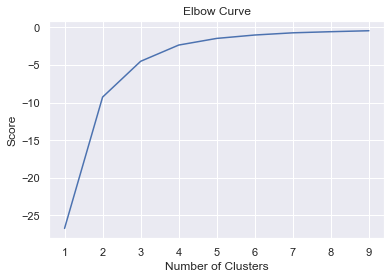

[[  51.06595494 -114.04577493]
 [  50.93732424 -113.97275068]
 [  51.09310275 -114.15621831]
 [  51.09014869 -113.96382288]
 [  50.97589253 -114.07335372]]


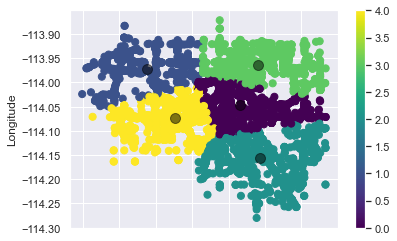

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import os 

os.chdir("C:\dataset")
df = pd.read_csv("TrafficIn.csv")


X=df.loc[:,['START_DT','Latitude','Longitude']]


K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)

plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

kmeans = KMeans(n_clusters = 5, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering

X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point

X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

X = X[['START_DT','cluster_label']]

clustered_data = df.merge(X, left_on='START_DT', right_on='START_DT')

clustered_data.to_csv ('clustered_data.csv', index=None, header = True)

centers = kmeans.cluster_centers_
print(centers)